<a href="https://colab.research.google.com/github/JeongHanJun/Colab/blob/master/ML_%EB%AA%A8%EB%8D%B8%EC%9D%98_%ED%95%99%EC%8A%B5_%EC%84%B1%EB%8A%A5_%ED%8F%89%EA%B0%80_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML 분류 모델의 학습 성능 평가 방법

## 1. Confusion Matrix
  
  모델의 평가를 위해, 모델이 제시한 답안, 즉 '모델의 출력' 과 실제 정답의 관계를 비교하여 맞는지/틀렸는지 를 True/False 로 판단한다.  
  그렇다면 이 부분을 TT/TF/FT/FF 처럼 4가지의 경우가 나올 수 있다.

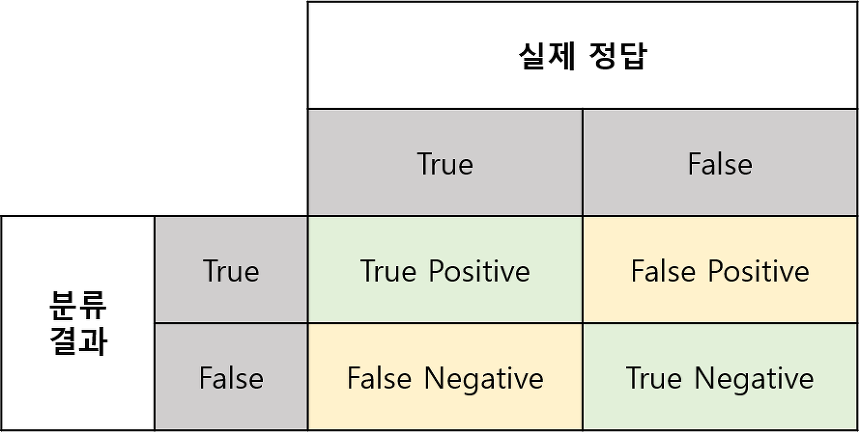

TP (True Positive) = 모델이 True라고 출력하였는데, 실제 답이 True 였다. (정답을 정답이라고 맞힘)  
FP (False Positive) = 모델이 True라고 출력하였는데, 실제 답이 False였다. (오답을 정답이라고 틀림)  
FN (False Negative) = 모델이 False 라고 출력하였는데, 실제 답이 True 였다. (정답을 오답이라고 놓침)  
TN (True Negative) = 모델이 False 라고 출력하였는데, 실제 답이 False 였다.(오답을 오답이라고 맞힘)  
  
    
    당연하게도, TP와 TN이 높을수록, 모델의 성능이 좋은 것이고, FP와 FN이 높을수록, 모델의 성능이 안 좋은 것이다.

## Confusion Matrix for Multi Class Classification  
아래 경우 A, B, C, D는 분류 모델의 Label 이름

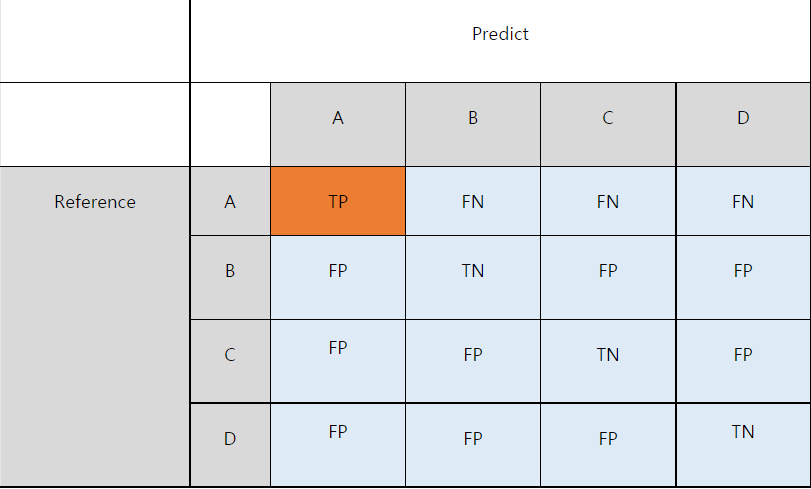

- 위의 사진에 대해 예시로, 자동차 주행 노면에 대한 분류 모델이라고 하면 아래와 같이 표현할 수 있다.

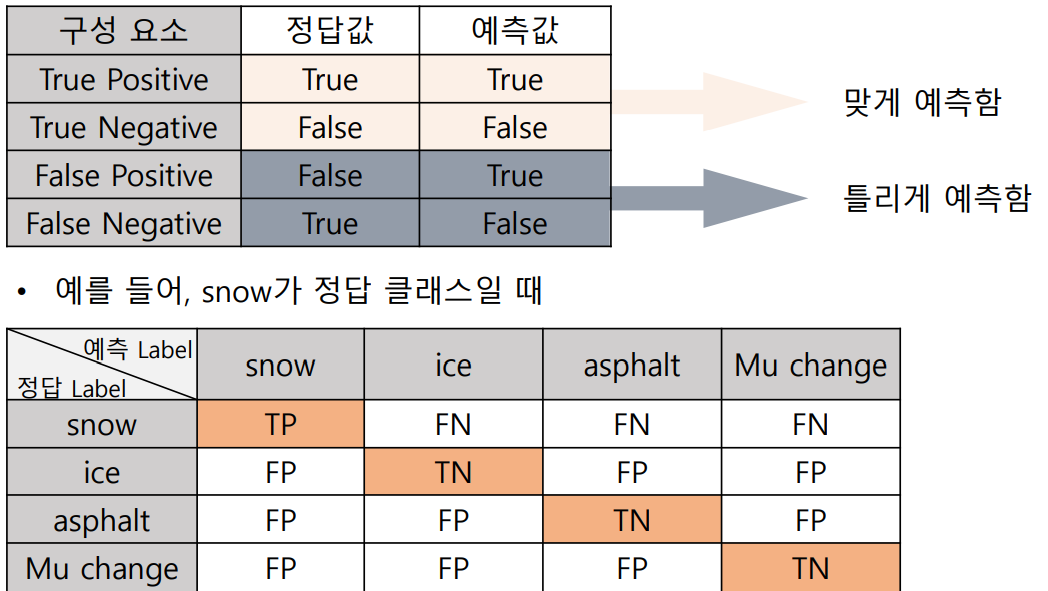

### TF, FP, FN, TN에 대한 이해를 위한 보충설명  
- ● = 실제 True인 값
- ○ = 실제 False인 값
- 중앙의 원은 모델이 True라고 예측한 값들의 집합

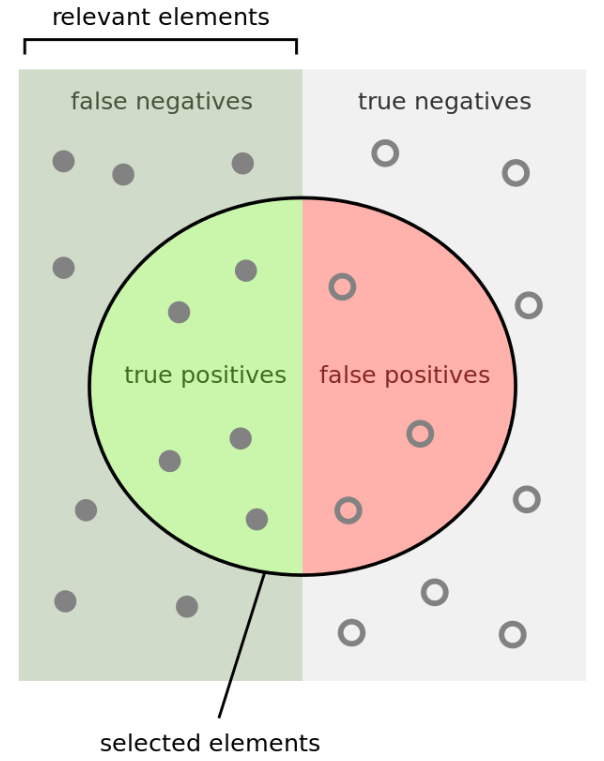

- 여기서 초록색 구역은 True인 값에 대해 True라고 예측하였으므로 TP를 의미한다.  
- 여기서 빨간색 구역은 False인 값에 대해 True라고 예측하였으므로 FP를 의미한다.  
- 여기서 회색 구역은 True인 값에 대해 False라고 예측하였으므로 FN을 의미한다.  
- 여기서 흰색 구역은 False인 값에 대해 False라고 예측하였으므로 TN을 의미한다.

## 1-1 Precision ( 정확도 )
- Precision은 모델이 True라고 예측한 집합(위의 그림상 중앙의 동그란 원 내부) 중에서  
정확하게 예측한 비율을 의미한다.    
- Precision = Positive Predictive Value (PPV)  
-
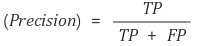  
  
  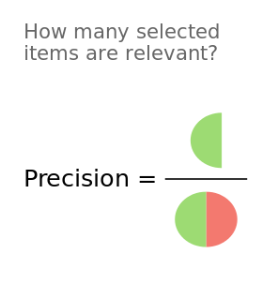

## 1-2 Recall ( 재현율 )  
- Recall은 실제 True인 값들의 집합 중에서, 모델이 True라고 예측한 비율을 의미한다.  
- Recall = Sensitivity = Hit rate
- 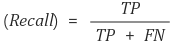
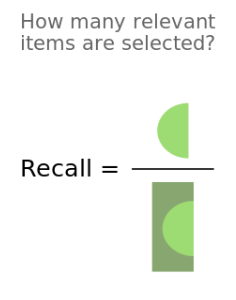

▶ Precision과 Recall 의 상반관계  
- 정확도와 재현율은 분자가 'TP'로 같다.
- 하지만 분모는 TP+FP / TP+FN으로써 서로 다르다.
- FP와 FN은 서로 상반관계이다.
- FP는 모델이 True라고 예측한 것이고, FN은 모델이 False라고 예측한 것이다.
- 또한, FP는 실제로 False인 값이고, FN은 실제로 True인 값이다.
- 즉 이들은 서로 상반관계로써 한쪽이 올라가면, 다른 한쪽이 내려가게 되는 관계이다.
- 이것을 보고 Precision 과 Recall 의 Trade-Off Relation이라고 한다.


## 1-3 Accuracy ( 정확도 )  
- 위의 정확도와 재현율은 TP에 중점을 두었다. 둘다 분자에 TP만 존재함으로써, True로 분류한 값의 비율에 대한 내용이었다.
- 하지만 False인 값에 대해 False라고 모델이 분류한다면, 이것 또한 맞게 분류한 것이다.
- 이 부분을 나타내는 지표가 Accuracy 정확도 이다.  
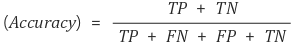

- 이는 직관적으로 모델의 성능을 평가할 수 있다는 장점이 있다.
- 그러나, 모델의 편향(bias)에 의존성이 높다.
- 예를 들어, 8월에 눈이 오는 날을 예측한다고 하면,  
애초에 8월에 눈이 올 확률 자체가 거의 0에 가까우므로, 이렇게 기존 데이터들이 한쪽에 몰려있게 되면, 정확도를 평가하기가 어렵다.
- 이를 보완하기 위해서 등장한 지표가 F1 Score이다.

## 1-4. F1 Score  
- F1 Score는 Precision과 Recall의 조화평균값이다.  

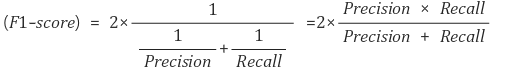

- F1 Score는 데이터들이 불균형하게 존재할 경우에도, 모델의 성능을 정확하게 평가할 수 있다.
- 물론 F1 Score도 Precision과 Recall을 사용했으므로, TN에 대한 부분은 고려하지 않는다는 단점이 있다.

## 2. Roc Curve and AUC in Python


In [3]:
from sklearn import *

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


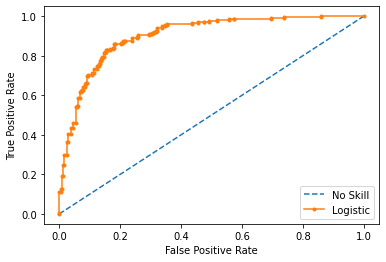

In [9]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
# 2개의 클래스, 1000개의 데이터 생성
X, y = make_classification(n_samples = 1000, n_classes = 2, random_state = 1)
# train/test 로 split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 2)

ns_probs = [ 0 for _ in range(len(test_y)) ]

model = LogisticRegression(solver = 'lbfgs')
model.fit(train_X, train_y)

lr_probs = model.predict_proba(test_X)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Logistic: f1=0.841 auc=0.898


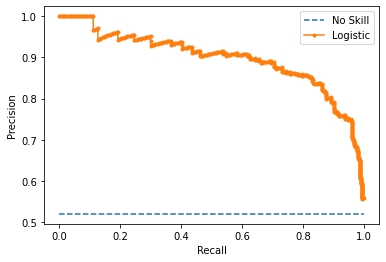

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples = 1000, n_classes = 2, random_state = 1)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 2)

model = LogisticRegression(solver = 'lbfgs')
model.fit(train_X, train_y)

lr_probs = model.predict_proba(test_X)
lr_probs = lr_probs[:, 1]

yhat = model.predict(test_X)
lr_precision, lr_recall , _ = precision_recall_curve(test_y, lr_probs)
lr_f1, lr_auc = f1_score(test_y, yhat), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


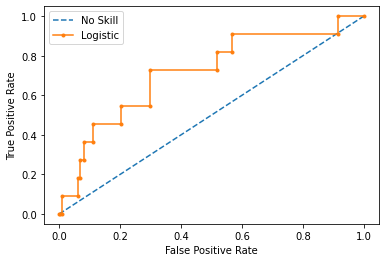

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.000 auc=0.054


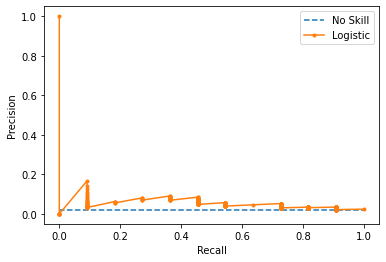

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()